# TFM 16ª Ed Máster Data Science Madrid Kschool
# Predicción de MVP de la NBA temporada 2019

## Introducción
En este TFM prentendemos, mediante la aplicación de Modelos estadísticos de Machine Learning supervisado intentar predecir qué jugador de la NBA será MVP para la actual temporada.

### Descripción de datos sin procesar: 
Los datos que vamos a necesitar serán:
    * Estadísticas individuales por jugador
    * Estadísticas y votos de los ganadores MVP de temporadas anteriores
    Todos los datos los encontramos en www.basketball-reference.com
    
### Metodología: 
Utilizaremos Supervised Learning por lo que necesitaremos datos de entrenamiento etiquetado formado por parejas de vectores etiquetados.

En el vector Input (X) contendrá las estadísticas de los jugadores finalistas y ganadores de las temporadas anteriores.

En el vector Output (Y), la puntuacion asignada como premio (share_awards)

El resultado de la relacion será una Regresión, pues el dato que esperamos es un número, no una clasificación del dato.

#### Tipos de modelos
Regression: 
* Linear Regression 
* k neighbor Regressor 
* Decision Tree 
 
#### Metricas
Regression: 
* RMSE 
* MAE and MAPE 
* Correlation and Bias

#### Herramientas
Jupyter Notebook

Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit Learn
    

  
### Resumen de resultados principales 
○ Los resultados detallados estarán disponibles ejecutando el código en el repositorio 
### Conclusiones 
○ No es un resumen del trabajo. El problema era relevante, ahora con su trabajo, ¿qué puede decir acerca de cómo se resuelve el problema? 


# Load, clean and study data

Voting
* First -- First Place Votes
* Totals
* G -- Games

Per Game
* MP -- Minutes Played Per Game
* PTS -- Points Per Game
* TRB -- Total Rebounds Per Game
* AST -- Assists Per Game
* STL -- Steals Per Game
* BLK -- Blocks Per Game

Shooting
* FG% -- Field Goal Percentage
* 3P% -- 3-Point Field Goal Percentage
* FT% -- Free Throw Percentage

Advanced
* WS -- Win Shares, An estimate of the number of wins contributed by a player.
* WS/48 -- Win Shares Per 48 Minutes, An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)

In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# read the winner players other season that it will use for training model
mvp_win_train = pd.read_csv('Data/MVP Winners.csv', sep=';',header=0)

In [4]:
#Refill datas NAN to 0
mvp_win_train.fillna(0, inplace=True) 

In [5]:
# Drop data with NaN
mvp_win_train.dropna()

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82.0,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82.0,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80.0,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80.0,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82.0,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182
5,1980-81,Marques Johnson,0.731707,1.0,73.0,690.0,0.106,76.0,33.4,20.3,6.8,4.6,1.5,0.5,0.552,0.000,0.706,11.2,0.211
6,1980-81,Robert Parish,0.756098,0.0,53.0,690.0,0.077,82.0,28.0,18.9,9.5,1.8,1.0,2.6,0.545,0.000,0.710,10.9,0.228
7,1980-81,Dennis Johnson,0.695122,0.0,50.0,690.0,0.072,79.0,33.1,18.8,4.6,3.7,1.7,0.8,0.436,0.216,0.820,8.4,0.154
8,1980-81,Tiny Archibald,0.756098,0.0,32.0,690.0,0.046,80.0,35.3,13.8,2.2,7.7,0.9,0.2,0.499,0.000,0.816,6.9,0.118
9,1980-81,Jamaal Wilkes,0.658537,0.0,19.0,690.0,0.028,81.0,37.4,22.6,5.4,2.9,1.5,0.4,0.526,0.077,0.758,8.5,0.135


In [6]:
mvp_win_train.sample(50)

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
586,2013-14,Tony Parker,0.756098,0.0,21.0,1250.0,0.017,68.0,29.4,16.7,2.3,5.7,0.5,0.1,0.499,0.373,0.811,5.9,0.141
195,1989-90,Tom Chambers,0.658537,0.0,12.0,920.0,0.013,81.0,37.6,27.2,7.0,2.3,1.1,0.6,0.501,0.279,0.861,11.2,0.176
24,1980-81,Walter Davis,0.695122,0.0,3.0,690.0,0.004,78.0,28.0,18.0,2.6,3.9,1.2,0.2,0.539,0.412,0.836,7.1,0.157
140,1986-87,Charles Barkley,0.548780,1.0,113.0,780.0,0.145,68.0,40.3,23.0,14.6,4.9,1.8,1.5,0.594,0.202,0.761,12.0,0.210
414,2002-03,Kevin Garnett,0.621951,43.0,871.0,1190.0,0.732,82.0,40.5,23.0,13.4,6.0,1.4,1.6,0.502,0.282,0.751,15.6,0.225
478,2006-07,Kevin Garnett,0.390244,0.0,7.0,1290.0,0.005,76.0,39.4,22.4,12.8,4.1,1.2,1.7,0.476,0.214,0.835,10.7,0.171
541,2010-11,Tony Parker,0.743902,0.0,3.0,1210.0,0.002,78.0,32.4,17.5,3.1,6.6,1.2,0.0,0.519,0.357,0.769,8.2,0.156
256,1993-94,Shaquille O'Neal,0.609756,3.0,289.0,1010.0,0.286,81.0,39.8,29.3,13.2,2.4,0.9,2.9,0.599,0.000,0.554,16.9,0.252
71,1982-83,Bernard King,0.536585,0.0,4.0,750.0,0.005,68.0,32.5,21.9,4.8,2.9,1.3,0.2,0.528,0.000,0.722,7.5,0.163
590,2013-14,Mike Conley,0.609756,0.0,1.0,1250.0,0.001,73.0,33.5,17.2,2.9,6.0,1.5,0.2,0.450,0.361,0.815,8.2,0.161


In [7]:
#Analyze the basics stadistics
mvp_win_train.describe()

,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.619196,6.400616,166.371186,1039.383667,0.156200,74.996918,36.329738,22.003852,7.459014,5.002003,1.427735,0.981664,0.494359,0.257590,0.780200,10.697227,0.187664
std,0.136740,20.260660,284.687084,206.787425,0.257948,9.327048,3.035173,5.170927,3.293852,2.832676,0.584946,0.928818,0.045544,0.153609,0.087698,3.365836,0.048555
min,0.000000,0.000000,1.000000,690.000000,0.001000,17.000000,23.600000,4.700000,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.046000
25%,0.548780,0.000000,3.000000,800.000000,0.004000,73.000000,34.600000,18.800000,4.800000,2.800000,1.000000,0.300000,0.463000,0.167000,0.737000,8.500000,0.155000
50%,0.646341,0.000000,23.000000,1130.000000,0.021000,79.000000,36.700000,22.000000,6.900000,4.300000,1.400000,0.600000,0.492000,0.302000,0.790000,10.600000,0.187000
75%,0.696970,1.000000,184.000000,1230.000000,0.177000,81.000000,38.300000,25.700000,10.400000,6.700000,1.800000,1.400000,0.523000,0.365000,0.843000,12.900000,0.218000
max,0.890244,131.000000,1310.000000,1310.000000,1.000000,82.000000,43.700000,37.100000,18.700000,14.500000,3.700000,5.600000,0.670000,1.000000,0.948000,21.200000,0.322000


In [8]:
#Study columns of dataframe
mvp_win_train.columns

Index(['season', 'player', 'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48'],
      dtype='object')

In [9]:
#Check types of columns
mvp_win_train.dtypes

season          object
player          object
win_pct        float64
votes_first    float64
points_won     float64
points_max     float64
award_share    float64
g              float64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct        float64
ft_pct         float64
ws             float64
ws_per_48      float64
dtype: object

In [10]:
#Check columns type double
mvp_win_train.columns[mvp_win_train.dtypes==double]

Index(['win_pct', 'votes_first', 'points_won', 'points_max', 'award_share',
       'g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
       'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48'],
      dtype='object')

In [11]:
mvp_win_train.sort_values(by=['win_pct', 'votes_first', 'points_won', 'points_max', 'award_share',
       'g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
       'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48'], ascending=False).head()

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
603,2015-16,Stephen Curry,0.890244,131.0,1310.0,1310.0,1.000,79.0,34.2,30.1,5.4,6.7,2.1,0.2,0.504,0.454,0.908,17.9,0.318
609,2015-16,Draymond Green,0.890244,0.0,50.0,1310.0,0.038,81.0,34.7,14.0,9.5,7.4,1.5,1.4,0.490,0.388,0.696,11.1,0.190
285,1995-96,Michael Jordan,0.878049,109.0,1114.0,1130.0,0.986,82.0,37.7,30.4,6.6,4.3,2.2,0.5,0.495,0.427,0.834,20.4,0.317
289,1995-96,Scottie Pippen,0.878049,0.0,226.0,1130.0,0.200,77.0,36.7,19.4,6.4,5.9,1.7,0.7,0.463,0.374,0.679,12.3,0.209
299,1995-96,Dennis Rodman,0.878049,0.0,4.0,1130.0,0.004,64.0,32.6,5.5,14.9,2.5,0.6,0.4,0.480,0.111,0.528,6.2,0.143


# Matriz de correlación

Calculamos y visualizamos gráficamente la matriz de correlación para poder descartar las variables que tienen una relación directa en nuestro dataset antes de aplicar los modelos de regresión.

In [12]:
mvp_win_train.corr()

,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
win_pct,1.000000,0.232200,0.258197,0.101646,0.255611,0.040883,-0.121442,-0.159969,-0.051904,0.043322,-0.025146,0.053017,0.118138,-0.035299,0.006551,0.223005,0.277174
votes_first,0.232200,1.000000,0.837067,0.094206,0.826070,0.091241,0.140588,0.291583,0.091154,0.113632,0.088693,0.052608,0.075079,0.067753,0.075589,0.471081,0.454768
points_won,0.258197,0.837067,1.000000,0.174287,0.979785,0.107557,0.222478,0.413083,0.159732,0.123479,0.109690,0.126593,0.116555,0.057917,0.044775,0.612050,0.592073
points_max,0.101646,0.094206,0.174287,1.000000,0.075690,-0.191926,0.140024,0.041962,-0.024536,0.052698,-0.075322,-0.015590,-0.305924,0.307577,0.017466,0.143110,0.218258
award_share,0.255611,0.826070,0.979785,0.075690,1.000000,0.125340,0.232764,0.432719,0.183031,0.128249,0.138098,0.137457,0.145335,0.033452,0.062242,0.629657,0.598799
g,0.040883,0.091241,0.107557,-0.191926,0.125340,1.000000,0.138509,0.081801,-0.005314,0.017056,0.074237,-0.003445,0.106975,-0.033808,0.118028,0.445724,0.036030
mp_per_g,-0.121442,0.140588,0.222478,0.140024,0.232764,0.138509,1.000000,0.509170,0.180999,0.122620,0.309939,-0.000918,-0.148928,0.119920,-0.032410,0.367020,0.077566
pts_per_g,-0.159969,0.291583,0.413083,0.041962,0.432719,0.081801,0.509170,1.000000,0.069960,-0.097615,0.108234,0.013362,0.040272,0.156696,0.180179,0.489733,0.390867
trb_per_g,-0.051904,0.091154,0.159732,-0.024536,0.183031,-0.005314,0.180999,0.069960,1.000000,-0.529854,-0.287022,0.671800,0.415764,-0.410472,-0.507207,0.223954,0.211900
ast_per_g,0.043322,0.113632,0.123479,0.052698,0.128249,0.017056,0.122620,-0.097615,-0.529854,1.000000,0.545504,-0.516329,-0.270998,0.339991,0.310682,0.117961,0.095708


In [13]:
import seaborn as sns
sns.set()

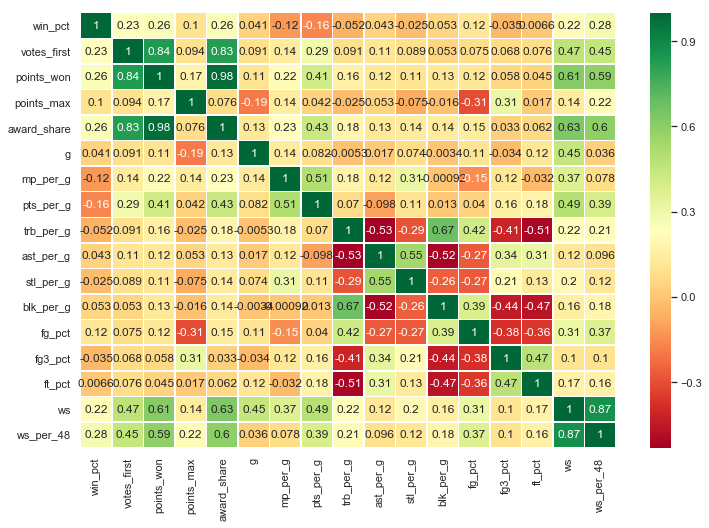

In [14]:
sns.heatmap(mvp_win_train.corr(), annot= True, cmap='RdYlGn',linewidths=.5)
plt.gcf().set_size_inches(12,8)

Segun la matriz de correlacion, la variable points_won está directamente relacionada con los ganadores del MVP

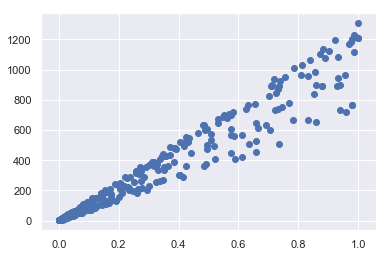

In [15]:
plt.scatter(mvp_win_train["award_share"],mvp_win_train["points_won"])
plt.ylabel = "award share"
plt.xlabel = "points won"

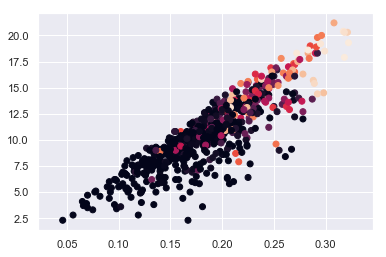

In [16]:
plt.scatter(mvp_win_train["ws_per_48"],mvp_win_train["ws"],c=mvp_win_train["award_share"]);

In [22]:
# Borramos las columnas que no necesitamos y creamos los vectores Input y Output del modelo
X = mvp_win_train.drop(['season', 'player', 'win_pct', 'votes_first', 'points_won','points_max', 'award_share', 'ws', 'ws_per_48'], axis=1)
y = mvp_win_train['award_share']

In [23]:
mvp_win_train[['g', 'mp_per_g', 'pts_per_g', 'trb_per_g','ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 
                   'ft_pct']].values

array([[82.   , 35.   , 24.6  , ...,  0.521,  0.222,  0.787],
       [82.   , 39.5  , 21.2  , ...,  0.478,  0.27 ,  0.863],
       [80.   , 37.2  , 26.2  , ...,  0.574,  0.   ,  0.766],
       ...,
       [73.   , 36.   , 22.9  , ...,  0.428,  0.29 ,  0.656],
       [81.   , 31.8  , 15.9  , ...,  0.669,  0.   ,  0.636],
       [55.   , 35.2  , 27.4  , ...,  0.51 ,  0.339,  0.665]])

In [24]:
X.columns

Index(['g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
       'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct'],
      dtype='object')

# Machine Learning Supervised
## Train Test Split

#### Comenzamos diviendo los datos en 2 grupos:
* Train: 90%    
* Test: 10%

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)


## Regresor

Necesitamos aplicar modelos de regresion para buscar el MVP de la NBA pues lo que esperamos encontrar al aplicar dichos  modelos es encontrar un número.

### Linear Regressor

#### Entrenamos modelo 

In [27]:
# SCIKit Learn Linear Regressor
from sklearn.linear_model import LinearRegression
# Create an instance of the model 
MVP_LIN = LinearRegression()
# Fit the regressor 
MVP_LIN.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Evaluamos el modelo

In [28]:
# Predict
y_MVP_LIN = MVP_LIN.predict(X_test)

#### Comparamos las predicciones del modelo con las variables reales

In [29]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Use against predictions (we must calculate the square root of the MSE)
MAE_LIN = mean_absolute_error(MVP_LIN.predict(X_test), y_test)

In [30]:
# MAPE
MAPE_LIN = np.mean(np.abs(MVP_LIN.predict(X_test)-y_test)/y_test)

In [31]:
# cross validation
from sklearn.model_selection import cross_val_score
# We calculate the metric for several subsets (determine by cv)
# With cv=5, we will have 5 results from 5 training/test
XVAL_LIN =cross_val_score(MVP_LIN,X,y,cv=5,scoring="neg_mean_squared_error")

In [32]:
# Load the scorer
from sklearn.metrics import mean_squared_error
# Use against predictions (we must calculate the square root of the MSE)
MSE_LIN = np.sqrt(mean_squared_error(MVP_LIN.predict(X_test),y_test))

In [33]:
metrics_df=pd.DataFrame([['Linear Regressor', MAE_LIN, MAPE_LIN, XVAL_LIN, MSE_LIN]], 
                              columns=['Model', 'MAE', 'MAPE', 'XVAL', 'MSE'])

#### Imprimimos el listado de resultado

In [34]:
df_indice = np.argsort(y_MVP_LIN)[::-1]
MVP_LIN_Result=y_MVP_LIN[df_indice]

In [35]:
# Print the results
for i in range (10):
    print(f"{i+1}.{mvp_win_train.iloc[df_indice[i]].player}: {MVP_LIN_Result[i]}")
    

1.Artis Gilmore: 0.45459648732657465
2.Larry Bird: 0.44669134920991893
3.Magic Johnson: 0.4364674826805932
4.Larry Bird: 0.3870983619887134
5.Jay Vincent: 0.36675017511459695
6.Michael Cooper: 0.3618598704472715
7.Robert Parish: 0.3533265752596131
8.Otis Birdsong: 0.3427403573284018
9.Kelvin Ransey: 0.321846337932463
10.Robert Parish: 0.29494231593003595


### K-Neighbors Regressor

#### Entrenamos modelo 

In [73]:
# SCIKit Learn K-Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
# Create an instance
MVP_KNR = KNeighborsRegressor(n_neighbors=2)
# Fit the data
MVP_KNR.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

#### Evaluamos el modelo

In [74]:
# Predict
y_MVP_KNR = MVP_KNR.predict(X_test)

In [75]:
y_MVP_KNR

array([0.119 , 0.2735, 0.017 , 0.035 , 0.0645, 0.215 , 0.376 , 0.6195,
       0.193 , 0.0245, 0.909 , 0.371 , 0.0125, 0.0025, 0.049 , 0.007 ,
       0.4415, 0.016 , 0.001 , 0.4385, 0.0015, 0.4395, 0.074 , 0.664 ,
       0.2015, 0.003 , 0.547 , 0.032 , 0.2325, 0.015 , 0.2225, 0.0195,
       0.5035, 0.0135, 0.368 , 0.052 , 0.0105, 0.119 , 0.043 , 0.035 ,
       0.004 , 0.1345, 0.2785, 0.013 , 0.035 , 0.072 , 0.013 , 0.224 ,
       0.001 , 0.0055, 0.0205, 0.0035, 0.0015, 0.502 , 0.4505, 0.001 ,
       0.0755, 0.0015, 0.034 , 0.791 , 0.0205, 0.211 , 0.3485, 0.0195,
       0.3975])

#### Comparamos las predicciones del modelo con las variables reales

In [82]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Use against predictions (we must calculate the square root of the MSE)
MAE_KNR=mean_absolute_error(MVP_KNR.predict(X_test), y_test)

In [77]:
# MAPE
MAPE_KNR=np.mean(np.abs(MVP_KNB.predict(X_test)-y_test)/y_test)

In [78]:
# cross validation
from sklearn.model_selection import cross_val_score
# We calculate the metric for several subsets (determine by cv)
# With cv=5, we will have 5 results from 5 training/test
XVAL_KNR=cross_val_score(MVP_KNR,X,y,cv=5,scoring="neg_mean_squared_error")

In [79]:
# Load the scorer
from sklearn.metrics import mean_squared_error
# Use against predictions (we must calculate the square root of the MSE)
MSE_KNR = np.sqrt(mean_squared_error(MVP_KNR.predict(X_test),y_test))

In [80]:
metrics_df.head()

,Model,MAE,MAPE,XVAL,MSE
0,Linear Regressor,0.177741,22.917401,"[-0.030361102526175427, -0.04149237219424583, ...",0.224524
1,K-Neighbors Regressor,0.147046,16.655477,"[-0.04321373846153846, -0.07125325384615386, -...",0.233127
2,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371
3,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371
4,Gradient Boosting Regressor,0.173810,12.817948,"[-0.04866822456142783, -0.06396966987197211, -...",0.237939


In [83]:
df=pd.DataFrame([['K-Neighbors Regressor', MAE_KNR, MAPE_KNR, XVAL_KNR, MSE_KNR]], 
                              columns=['Model', 'MAE', 'MAPE', 'XVAL', 'MSE'])
metrics_df=metrics_df.append(df, ignore_index=True)
metrics_df

,Model,MAE,MAPE,XVAL,MSE
0,Linear Regressor,0.177741,22.917401,"[-0.030361102526175427, -0.04149237219424583, ...",0.224524
1,K-Neighbors Regressor,0.147046,16.655477,"[-0.04321373846153846, -0.07125325384615386, -...",0.233127
2,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371
3,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371
4,Gradient Boosting Regressor,0.173810,12.817948,"[-0.04866822456142783, -0.06396966987197211, -...",0.237939
5,K-Neighbors Regressor,0.147046,16.655477,"[-0.04321373846153846, -0.07125325384615386, -...",0.233127


#### Imprimimos el listado de resultado

In [84]:
# Load the scorer
from sklearn.metrics import mean_squared_error
# Use against predictions (we must calculate the square root of the MSE)
np.sqrt(mean_squared_error(MVP_KNB.predict(X_test),y_test))

0.2331270205109388

In [85]:
df_indice = np.argsort(y_MVP_KNR)[::-1]
MVP_KNR_Result=y_MVP_KNB[df_indice]

In [86]:
# Print the results
for i in range (10):
    print(f"{i+1}.{mvp_win_train.iloc[df_indice[i]].player}: {MVP_KNR_Result[i]}")
    

1.Magic Johnson: 0.909
2.Sidney Moncrief: 0.7909999999999999
3.Michael Cooper: 0.664
4.Dennis Johnson: 0.6194999999999999
5.Bobby Jones: 0.547
6.Larry Bird: 0.5035000000000001
7.Jay Vincent: 0.502
8.Jamaal Wilkes: 0.4505
9.Otis Birdsong: 0.4415
10.Artis Gilmore: 0.4395


### Decision Tree Regressor

#### Entrenamos modelo 

In [48]:
# SCIKit Learn Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Create an instance
MVP_DTR = DecisionTreeRegressor(max_depth=5)
# Fit decision tree regression model
MVP_DTR.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
# Predict
y_MVP_DTR = MVP_DTR.predict(X_test)

#### Comparamos las predicciones del modelo con las variables reales

In [50]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Use against predictions (we must calculate the square root of the MSE)
MAE_DTR = mean_absolute_error(MVP_DTR.predict(X_test), y_test)

In [51]:
# MAPE
MAPE_DTR = np.mean(np.abs(MVP_DTR.predict(X_test)-y_test)/y_test)

In [52]:
# cross validation
from sklearn.model_selection import cross_val_score
# We calculate the metric for several subsets (determine by cv)
# With cv=5, we will have 5 results from 5 training/test
XVAL_DTR = cross_val_score(MVP_DTR,X,y,cv=5,scoring="neg_mean_squared_error")

In [53]:
# Load the scorer
from sklearn.metrics import mean_squared_error
# Use against predictions (we must calculate the square root of the MSE)
MSE_DTR = np.sqrt(mean_squared_error(MVP_DTR.predict(X_test),y_test))

In [54]:
df=pd.DataFrame([['Decision Tree Regressor', MAE_DTR, MAPE_DTR, XVAL_DTR, MSE_DTR]], 
                              columns=['Model', 'MAE', 'MAPE', 'XVAL', 'MSE'])
metrics_df=metrics_df.append(df, ignore_index= True)
metrics_df

,Model,MAE,MAPE,XVAL,MSE
0,Linear Regressor,0.177741,22.917401,"[-0.030361102526175427, -0.04149237219424583, ...",0.224524
1,K-Neighbors Regressor,0.147046,16.655477,"[-0.04321373846153846, -0.07125325384615386, -...",0.233127
2,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371


In [55]:
df=pd.DataFrame([['Decision Tree Regressor', MAE_DTR, MAPE_DTR, XVAL_DTR, MSE_DTR]], 
                              columns=['Model', 'MAE', 'MAPE', 'XVAL', 'MSE'])
metrics_df=metrics_df.append(df, ignore_index= True)
metrics_df

,Model,MAE,MAPE,XVAL,MSE
0,Linear Regressor,0.177741,22.917401,"[-0.030361102526175427, -0.04149237219424583, ...",0.224524
1,K-Neighbors Regressor,0.147046,16.655477,"[-0.04321373846153846, -0.07125325384615386, -...",0.233127
2,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371
3,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371


#### Imprimimos el listado de resultado

In [56]:
df_indice = np.argsort(y_MVP_DTR)[::-1]
MVP_DTR_Result=y_MVP_DTR[df_indice]

In [57]:
# Print the results
for i in range (10):
    print(f"{i+1}.{mvp_win_train.iloc[df_indice[i]].player}: {MVP_DTR_Result[i]}")

1.Magic Johnson: 0.9127142857142859
2.Larry Bird: 0.672
3.Larry Bird: 0.6419375
4.Robert Parish: 0.6419375
5.Kelly Tripucka: 0.6419375
6.Dennis Johnson: 0.5105000000000001
7.Robert Parish: 0.432888888888889
8.Ray Williams: 0.23443137254901952
9.Alex English: 0.23443137254901952
10.Bobby Jones: 0.23443137254901952


### Gradient Boosting Regressor

#### Entrenamos modelo 

In [58]:
# SCIKit Learn Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance
MVP_GBR = GradientBoostingRegressor(max_depth=5)
# Fit gradient boosting regression model
MVP_GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
# Predict
y_MVP_GBR = MVP_GBR.predict(X_test)

#### Comparamos las predicciones del modelo con las variables reales

In [60]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Use against predictions (we must calculate the square root of the MSE)
MAE_GBR=mean_absolute_error(MVP_GBR.predict(X_test), y_test)

In [61]:
# MAPE
MAPE_GBR=np.mean(np.abs(MVP_GBR.predict(X_test)-y_test)/y_test)

In [62]:
# cross validation
from sklearn.model_selection import cross_val_score
# We calculate the metric for several subsets (determine by cv)
# With cv=5, we will have 5 results from 5 training/test
XVAL_GBR=cross_val_score(MVP_GBR,X,y,cv=5,scoring="neg_mean_squared_error")

In [63]:
# Load the scorer
from sklearn.metrics import mean_squared_error
# Use against predictions (we must calculate the square root of the MSE)
MSE_GBR = np.sqrt(mean_squared_error(MVP_GBR.predict(X_test),y_test))

In [64]:
df=pd.DataFrame([['Gradient Boosting Regressor', MAE_GBR, MAPE_GBR, XVAL_GBR, MSE_GBR]], 
                              columns=['Model', 'MAE', 'MAPE', 'XVAL', 'MSE'])
metrics_df=metrics_df.append(df, ignore_index= True)
metrics_df

,Model,MAE,MAPE,XVAL,MSE
0,Linear Regressor,0.177741,22.917401,"[-0.030361102526175427, -0.04149237219424583, ...",0.224524
1,K-Neighbors Regressor,0.147046,16.655477,"[-0.04321373846153846, -0.07125325384615386, -...",0.233127
2,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371
3,Decision Tree Regressor,0.145300,13.564146,"[-0.059401295188864424, -0.08238515888909285, ...",0.217371
4,Gradient Boosting Regressor,0.173810,12.817948,"[-0.04866822456142783, -0.06396966987197211, -...",0.237939


#### Imprimimos el listado de resultado

In [65]:
df_indice = np.argsort(y_MVP_GBR)[::-1]
MVP_GBR_Result=y_MVP_GBR[df_indice]

In [66]:
# Print the results
for i in range (10):
    print(f"{i+1}.{mvp_win_train.iloc[df_indice[i]].player}: {MVP_GBR_Result[i]}")

1.Magic Johnson: 0.7951186514934754
2.Larry Bird: 0.33181047595170343
3.Larry Bird: 0.6077542885644689
4.Robert Parish: 0.851957105017046
5.Kelly Tripucka: 0.12393927075582865
6.Dennis Johnson: 0.5209689259004472
7.Robert Parish: 0.2857508170326766
8.Ray Williams: 0.08099568889123884
9.Alex English: 0.3758885017644457
10.Bobby Jones: 0.29193246511065324


## Predicción de la temporada actual

Una vez entrenados los modelo y seleccionados cúal es es modelo que vamos a utilizar, generamos la prediccion con los datos estadisticos de los jugadores de la temporada actual.

Para ello cargamos el fichero dónde tenemos almacenados los datos

Hacemos la limpieza de datos 

Lanzamos las predicciones

Mostramos la lista de los posibles ganadores del MVP

In [90]:
player_stat = pd.read_csv('Data/NBA Players Stats 2019 20.csv', sep=';',header=0)

In [91]:
player_stat.sample(10)

,Rk,Player,Pos,Age,Tm,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
289,286,Daryl Macon\maconda01,SG,24,MIA,4,3.500000,0.750000,0.000000,0.250000,...,NaN,0,0,0,1,0,0,2,1,3
19,20,Deandre Ayton\aytonde01,C,21,PHO,7,30.857143,15.428571,11.857143,2.285714,...,0.800,26,57,83,16,3,10,11,24,108
190,187,Gary Harris\harriga01,SG,25,DEN,34,33.058824,11.029412,2.852941,2.205882,...,0.830,19,78,97,75,46,9,36,80,375
461,458,Russell Westbrook\westbru01,PG,31,HOU,31,35.290323,24.096774,7.935484,7.000000,...,0.784,49,197,246,217,48,12,135,117,747
373,370,Vincent Poirier\poirivi01,C,26,BOS,9,4.888889,1.666667,1.666667,0.333333,...,0.500,8,7,15,3,2,2,3,10,15
227,224,Kyrie Irving\irvinky01,PG,27,BRK,11,33.818182,28.545455,5.363636,7.181818,...,0.937,10,49,59,79,12,6,26,32,314
275,272,Damion Lee\leeda03,SG,27,GSW,24,26.375000,12.333333,5.291667,2.166667,...,0.880,22,105,127,52,21,1,29,44,296
415,412,Ben Simmons\simmobe01,PG,23,PHI,36,35.361111,14.944444,7.500000,8.583333,...,0.590,67,203,270,309,78,26,130,123,538
271,268,Zach LaVine\lavinza01,SG,24,CHI,37,33.702703,23.648649,4.540541,3.972973,...,0.814,26,142,168,147,52,17,120,83,875
50,51,Isaac Bonga\bongais01,SF,20,WAS,31,16.161290,4.096774,2.935484,1.032258,...,0.750,29,62,91,32,19,8,17,65,127


In [92]:
player_stat.fillna(0, inplace=True) 
player_stat.dropna(0, inplace=True) 

In [102]:
X_player = player_stat[['g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
       'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct']]

In [103]:
# Predict
y_Player_LIN = MVP_LIN.predict(X_player)

In [104]:
# Predict
y_Player_KNR = MVP_KNR.predict(X_player)

In [105]:
# Predict
y_Player_DTR = MVP_DTR.predict(X_player)

In [106]:
# Predict
y_Player_GBR = MVP_GBR.predict(X_player)

In [108]:
df_ind_GBR = np.argsort(y_Player_GBR)[::-1]
MVP_GBR_Player = y_Player_GBR[df_ind_GBR]

In [110]:
# Print the results
for i in range (10):
    print(f"{i+1}.{player_stat.iloc[df_ind_GBR[i]].Player}: {MVP_GBR_Player[i]}")

1.James Harden\hardeja01: 0.9287354813956845
2.Giannis Antetokounmpo\antetgi01: 0.5467870286393671
3.Damian Lillard\lillada01: 0.5350586369965478
4.Luka Dončić\doncilu01: 0.5078737368225288
5.Trae Young\youngtr01: 0.5061994453204345
6.Devin Booker\bookede01: 0.3564040211324004
7.Jared Dudley\dudleja01: 0.32824582621904064
8.Charlie Brown\brownch02: 0.32667858772081754
9.Mike Muscala\muscami01: 0.2945634098304861
10.Romeo Langford\langfro01: 0.2920938462060733
